#**Projeto - Aplicação de Estatística na Análise de dados**
###**Descrição dos dados:**

**Contexto:**

Aproveitar as informações do cliente é fundamental para a maioria das empresas. No caso de uma seguradora, atributos de clientes como os citados abaixo podem ser cruciais na tomada de decisões de negócios. Portanto, saber explorar e gerar valor a partir desses dados pode ser uma habilidade inestimável.

**Informações dos atributos:**

1. **age:** idade do beneficiário 

2. **sex:** gênero dos contratantes de seguro: female, male

3. **bmi:** Body mass index( ou IMC: Índice de massa corporal), fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura.

4. **children:** número de filhos cobertos pelo seguro de saúde / Número de dependentes

5. **smoker:** sé é ou não fumante: yes, no

6. **region:** : a área residencial do beneficiário nos EUA: nordeste, sudeste, sudoeste, noroeste.

7. **charges:** despesas médicas individuais cobradas pelo seguro de saúde.

**Objetivos principais:**

     Realizar Análise Exploratória de Dados
     Aplicar estatística com Python
     Realizar Testes de Hipótese
     Gerar Insights

Base de dados: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance/

In [ ]:
%matplotlib inline

## Importação das bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import copy

## Lendo a base de dados

In [ ]:
df = pd.read_csv('insurance.csv') 

In [ ]:
df.head()  #checking the head of the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## AED
* Encontrar a forma dos dados, tipo de dados de colunas individuais
* Verificar a presença de valores ausentes
* Estatísticas descritivas de colunas numéricas
* Encontrar a distribuição de colunas numéricas e a assimetria associada e a presença de outliers
* Distribuição de colunas categóricas

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### - A base de dados tem 1338 linhas e 7 colunas. As colunas **age**, **bmi** e **charge** são numéricas. O restante das variávies são strings/object. 

###**Procurando por valores ausentes**

In [ ]:
df.isna().apply(pd.value_counts) # contando os valores nulos

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [ ]:
df.isna().any().sum()

0

### - Não há nenhum valor nulo em nossa base de dados 🙂

In [ ]:
df.describe().T   # checando as variávies numéricas

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### - A média de idade é de aproximadamente 39 anos
### - Pelo menos 50% das pessoas tem no máximo um único filho
### - O valor de despesas médicas cobradas (variável charges) possui grande variância chegando até valores de 63770
### - Pelo menos metade das pessoas tem despesas abaixo de 	9382

###**Distribuição das colunas ‘bmi’, ‘age’ and ‘charges’.**

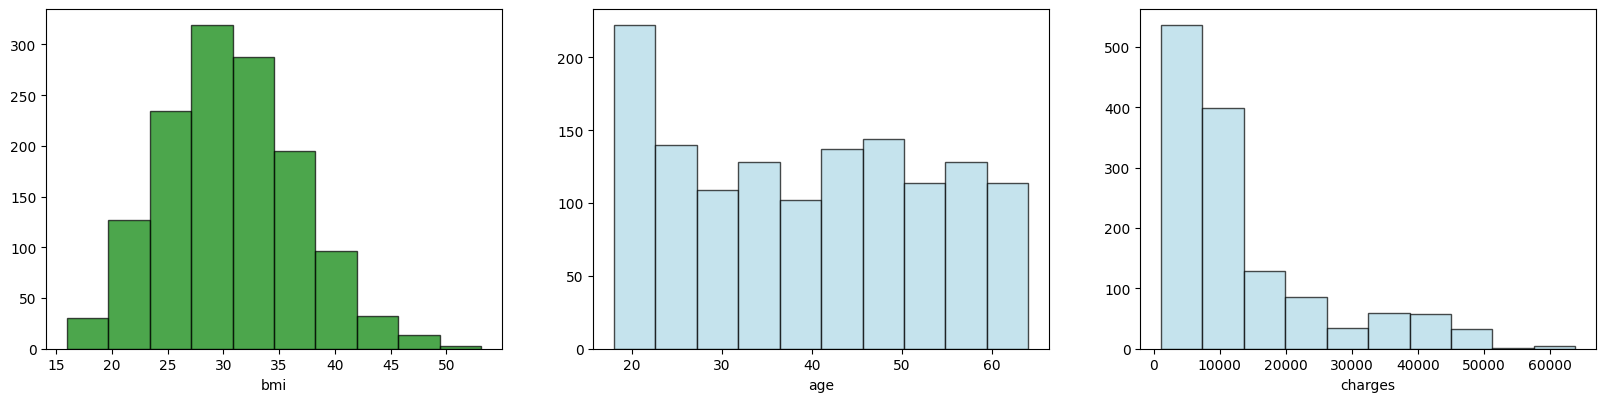

In [ ]:

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

### - podemos dizer que bmi segue uma distribuição normal
### - a idade parace ter uma distribuição um pouco mais uniforme e a maioria delas está na casa dos 20 anos.
### - os valores de despesa apresentam um enviesamento à esquerda, mostrando que a maioria das pessoas tem despesas médicas entre 1000 e 10.000

###**Verificando a assimetria das colunas ‘bmi’, ‘age’ and ‘charges’**

A função skew() nos permite calcular o valor de assimetria para uma distribuição, nos permitindo verificar a forma e regularidade dos dados de um ponto de vista estatístico.

In [ ]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


### - De fato, a coluna bmi tem baixo valor de assimetria, o que era esperado pois ela segue uma distribuição normal
### - age teve o valor mais baixo, isso mostra que as idades não variam muito, temos uma distribuição mais uniforme
### - charges realmente é uma distribuição completamente assimétrica devido ao alto valor de assimetria

###**Verificando a presença de outliers nas colunas ‘bmi’, ‘age’ and ‘charges**

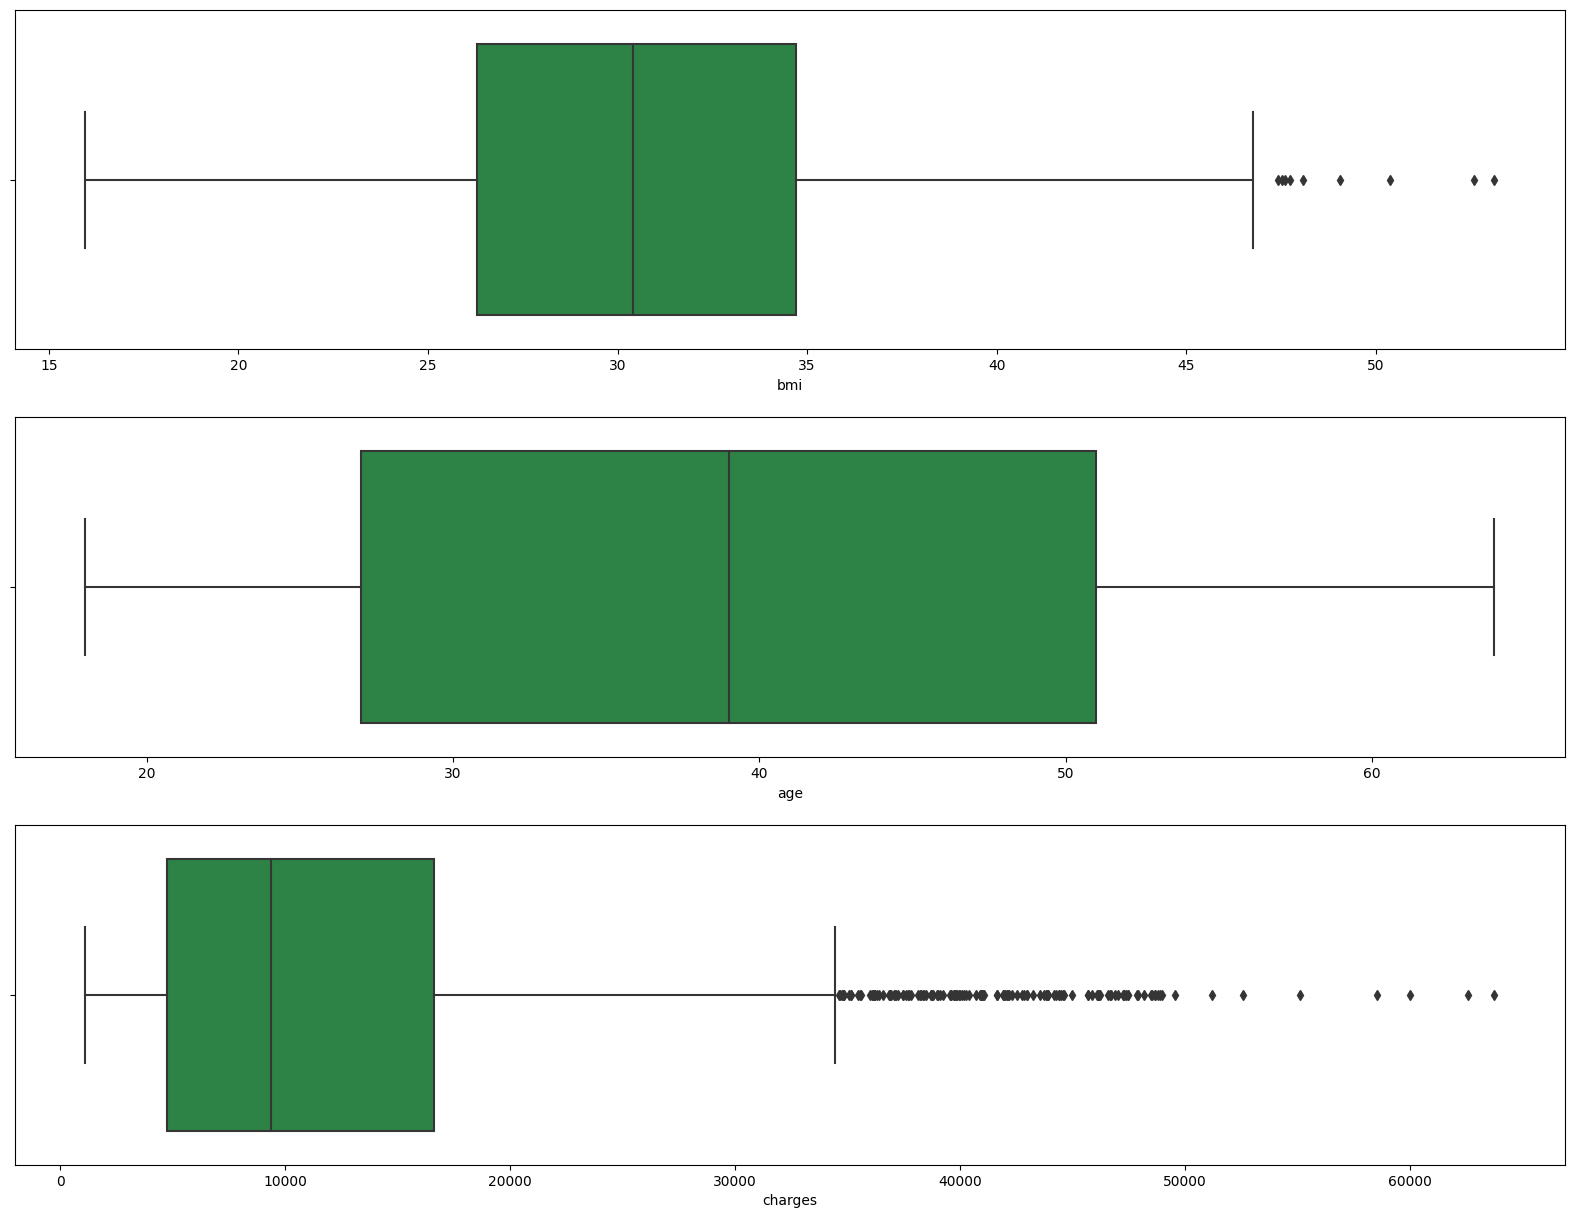

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color="#1f913f")

plt.subplot(3,1,2)
sns.boxplot(x= df.age,color="#1f913f")

plt.subplot(3,1,3)
sns.boxplot(x= df.charges,color="#1f913f")
plt.show()

### - bmi apresenta alguns outliers que seriam 25% de pessoas com imc acima de aproxidamente 47.
### - age apresenta uma grande disparidade nos dados, ou seja, há muitos valores longe da mediana
### charges apresenta muitos outliers, existem muitas pessoas com despesas atípicas, estatisticamente falando, pelo menos 25%. Mas vemos que a maioria das despesas se concentram perto da mediana que está por volta de 8000.

### **Vamos observar como estão as despesas de acordo com o sexo**

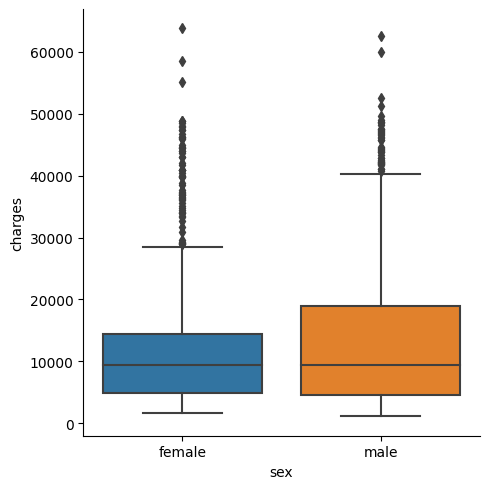

In [ ]:
sns.catplot(x='sex',y='charges',kind='box',data = df)
plt.show()

### - Mais das metade das despesas tanto para homens quanto para mulheres estão acima de 10.000, pois a mediana aparenta ser igual para esses dois grupos
### - É possível dizer que os homens tem valores de despesas maiores, pois o limite máximo de despesa não atípica para os homens está na casa de 40.000 e para as mulheres 30.000
### - Além disso, a variabilidade de despesas é maior nos homens. Os valores de despesas para as mulheres estão bem próximos da mediana, indicando que não variam tanto 

### **Vamos observar como estão as despesas de acordo com o sexo segredando por fumantes e não fumantes**

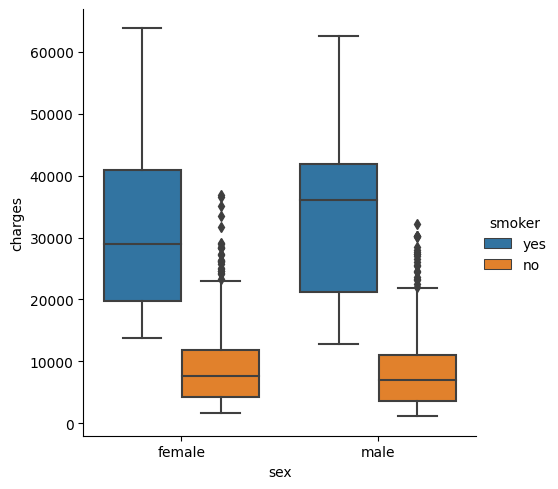

In [ ]:
sns.catplot(x='sex',y='charges',kind='box',hue='smoker',data = df)
plt.show()

### - Vemos uma diferença considerável entre fumantes e não fumantes. 25% dos valores mais baixos de despesas dos homens fumantes estão na mesma faixa dos 25% dos maiores para os não fumantes
### - O mesmo corre entre as mulheres, 25% dos menores valores das despesas das fumantes já estão acima de 75% das despesas das não fumantes
### - No geral, a diferença é notória entre os dois grupos, apresentando medianas bem distintas



###**Distribuição das colunas categóricas (include children)**

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

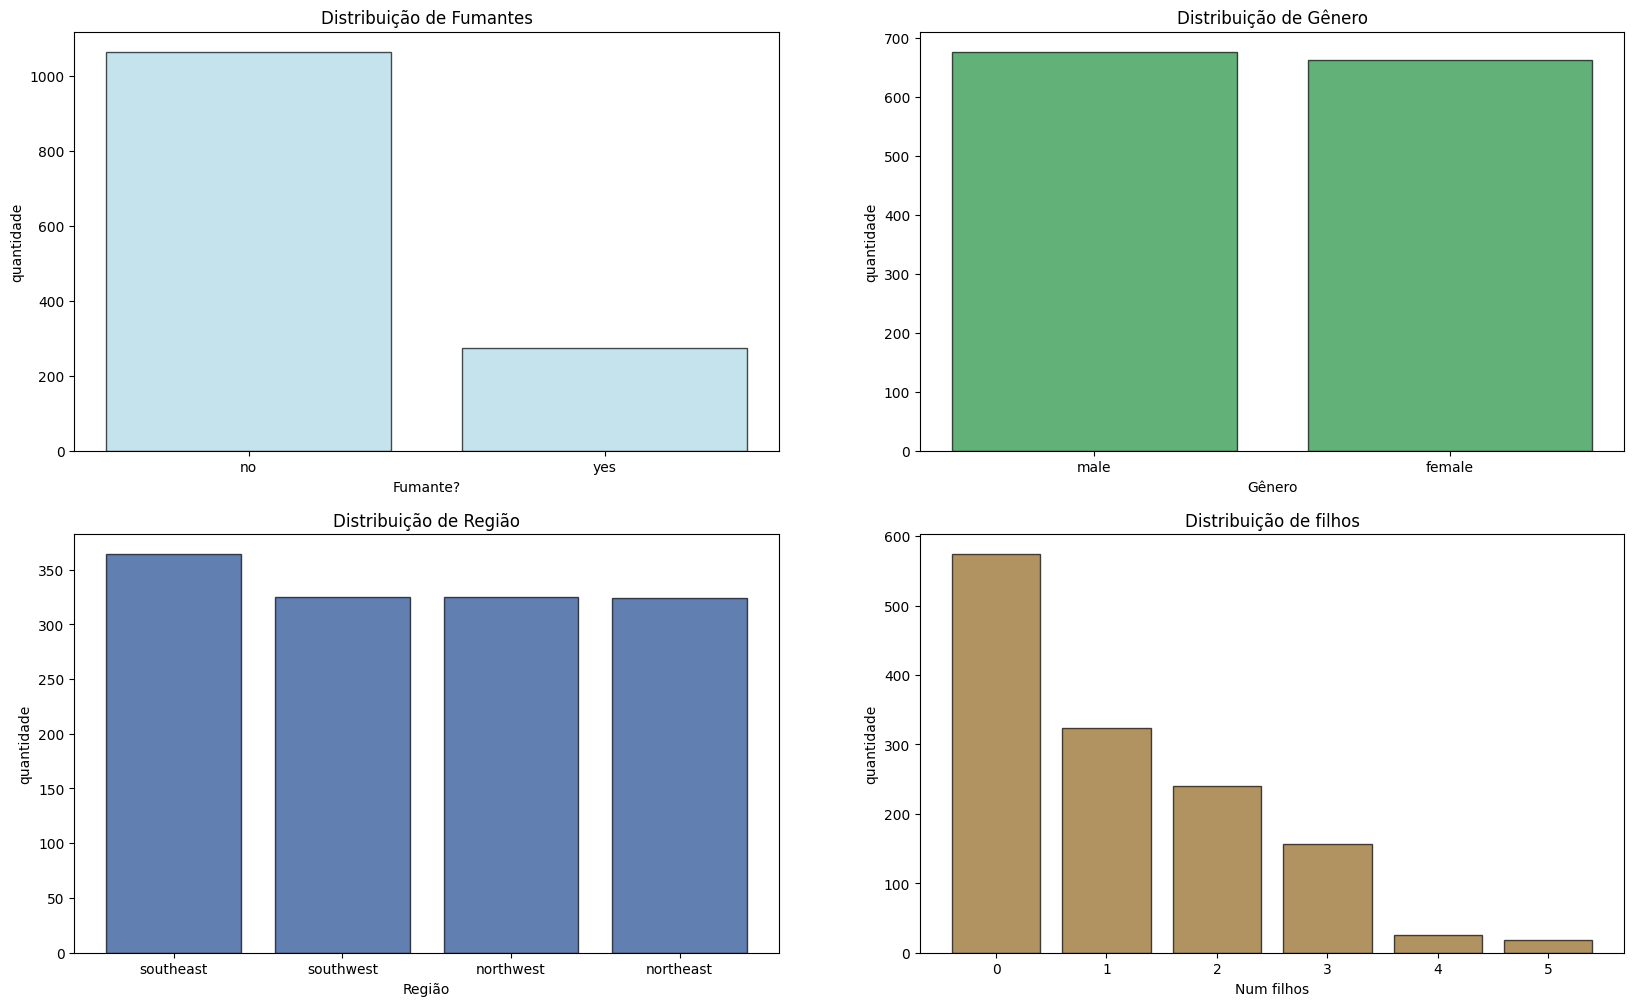

In [ ]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Valores para x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Quantidade de cada classe no y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot de bar chart
plt.xlabel('Fumante?')
plt.ylabel('quantidade')
plt.title('Distribuição de Fumantes')

x1 = df.sex.value_counts().index    #Valores para x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Quantidade de cada classe no y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = '#1f913f',edgecolor = 'black',alpha = 0.7)  #plot de bar chart
plt.xlabel('Gênero')
plt.ylabel('quantidade')
plt.title('Distribuição de Gênero')

x2 = df.region.value_counts().index    #Valores para x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Quantidade de cada classe no y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = '#1f4991',edgecolor = 'black',alpha = 0.7)  #plot de bar chart
plt.xlabel('Região')
plt.ylabel('quantidade')
plt.title("Distribuição de Região")

x3 = df.children.value_counts().index    #Valores para x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Quantidade de cada classe no y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = '#91651f',edgecolor = 'black',alpha = 0.7)  #plot de bar chart
plt.xlabel('Num filhos')
plt.ylabel('quantidade')
plt.title("Distribuição de filhos")

plt.show()


### - Há muito mais não fumantes do que fumantes nos dados
### - As instâncias são distribuídas uniformemente em todas as regiões
### - O gênero também é distribuído uniformemente
### - A maioria das pessoas tem menos de 2 filhos e muito poucas têm 4 ou 5 filhos

###**Visualização em pares**

<ipython-input-44-fbe5f5df32bf>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.loc[:,['sex', 'smoker','region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)


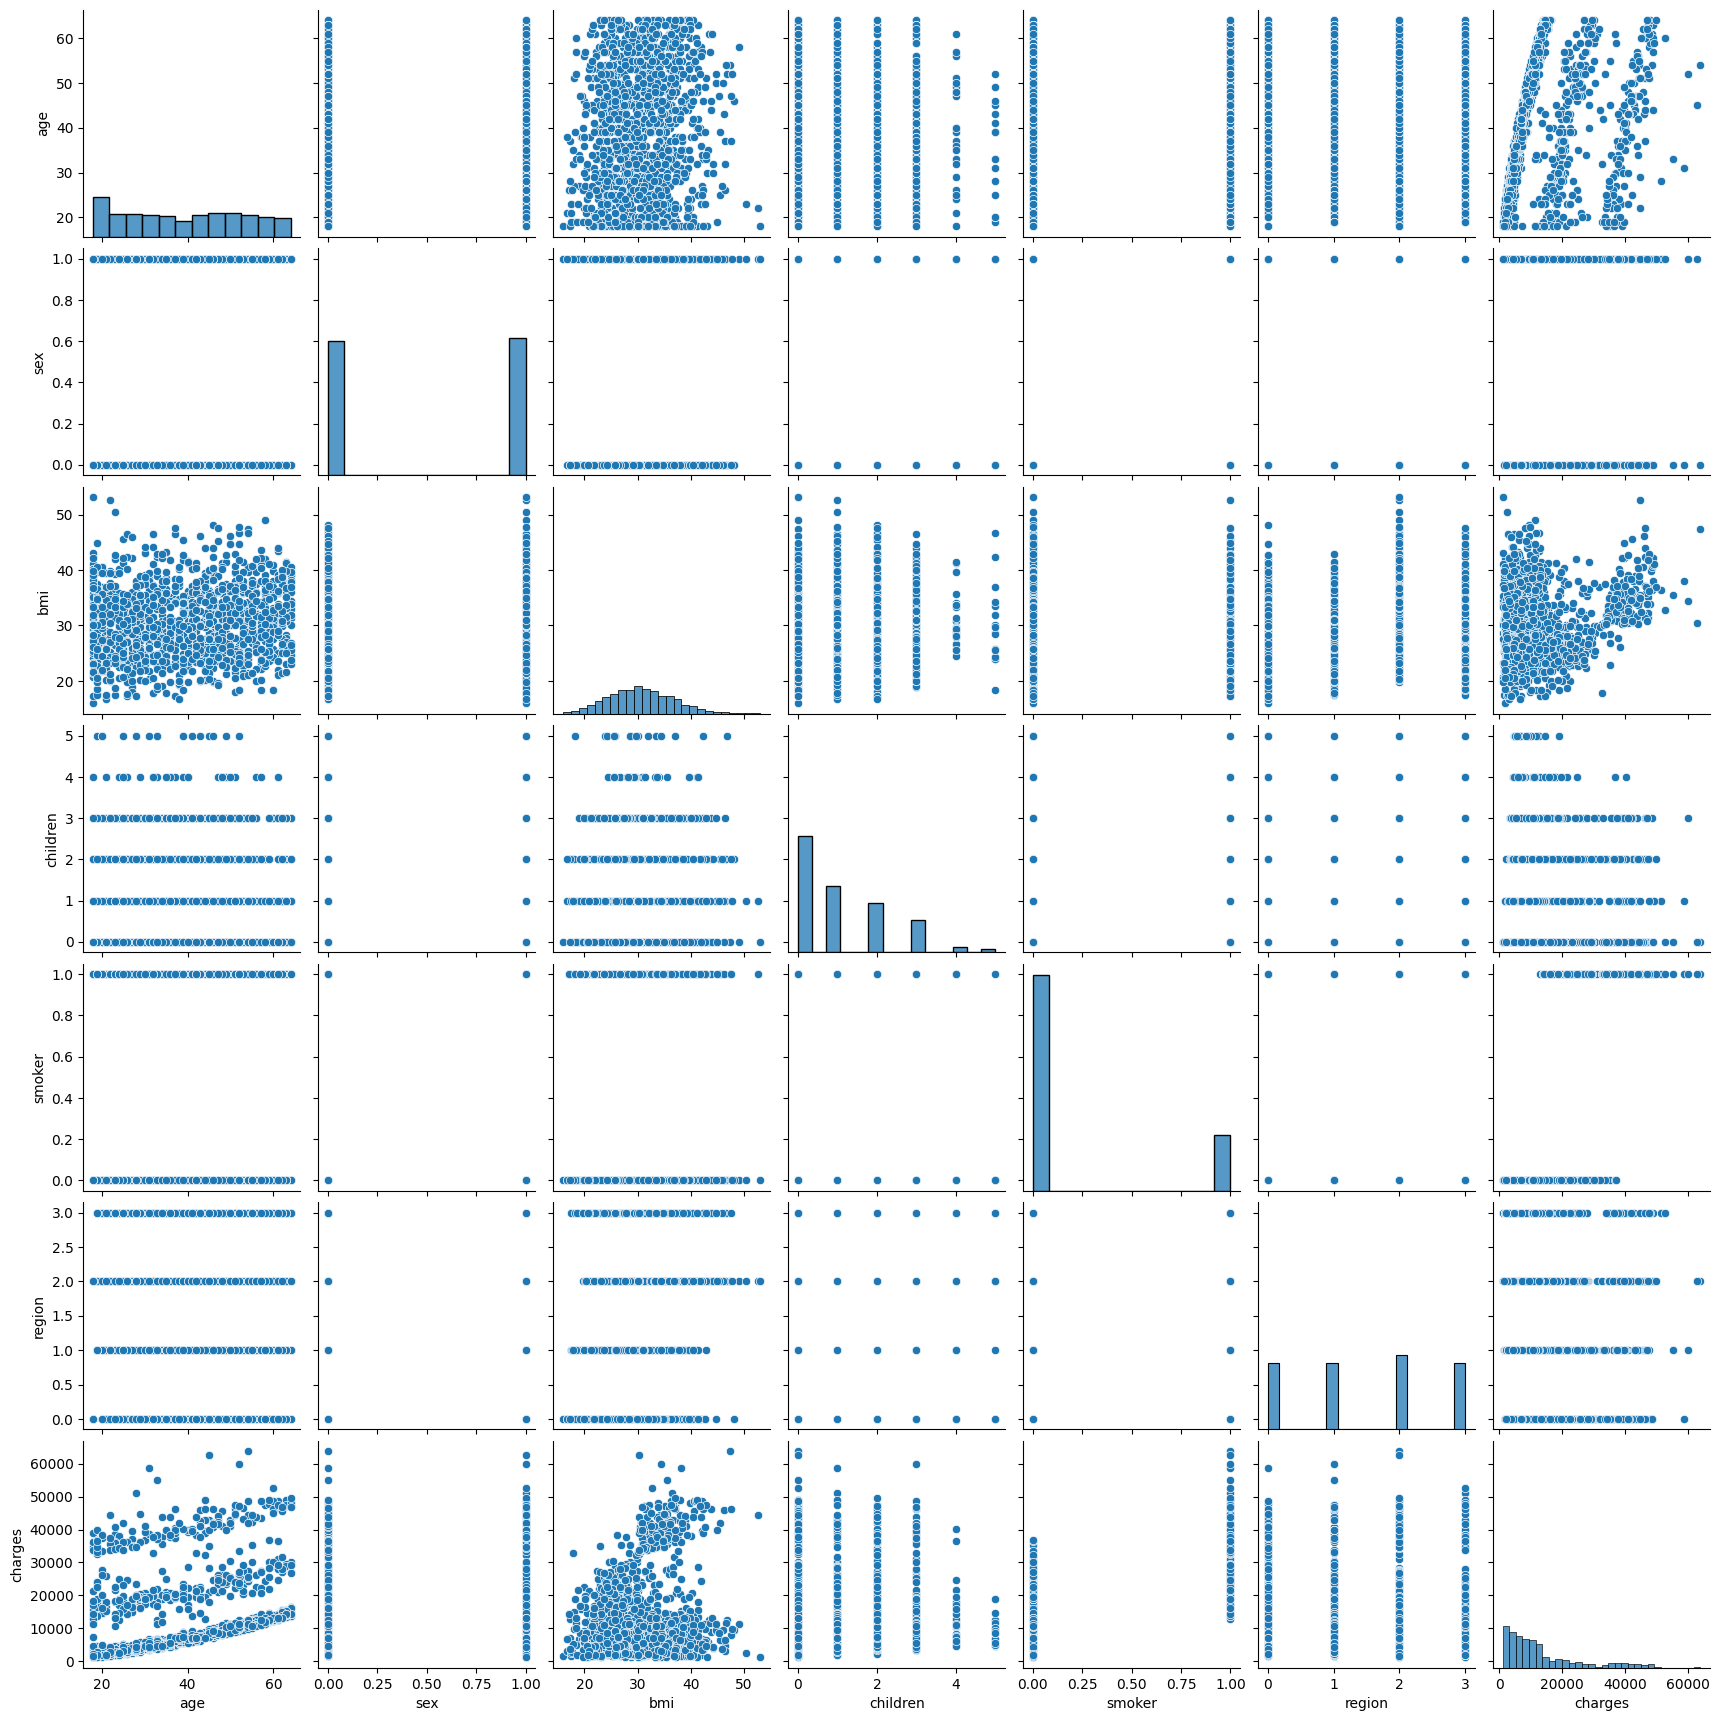

In [ ]:
# Como o pairplot ignora strings vamos transformar categórias em binárias

from sklearn.preprocessing import LabelEncoder

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker','region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### - A única correlação óbvia de 'charges' é com 'smoker'
### - Como já evidenciado os fumantes gastaram mais dinheiro do que os não fumantes
### - Existe um padrão interessante entre 'age' e 'charges'. Pode ser porque, para a mesma doença, os idosos pagam mais do que os mais jovens

#**Testes de Hipótese**

## As despesas de pessoas que fumam diferem significativamente das pessoas que não fumam?

In [ ]:

df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

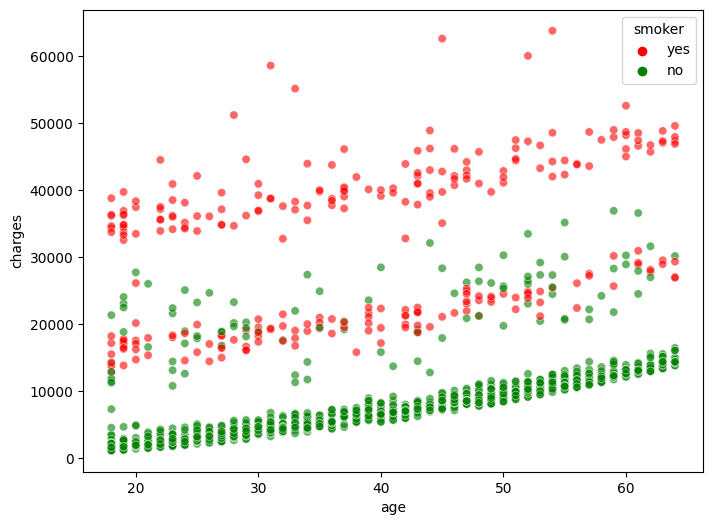

In [ ]:
# Vamos observar mais uma vez, mas agora com um scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='age', y='charges',hue='smoker',palette= ['red','green'] ,alpha=0.6)
plt.show()

### - Nós já tinhamos visto com o boxplot que existe uma diferença notória entra os fumantes e não fumantes. E olhado o scatter acima fica ainda mais evidente. A medida que olhamos para parte mais baixo do gráfico só há não fumantes e para os valores mais altos de despesa só existem fumantes.

Mas vamos verificar essa diferença estatisticamente por meio de um teste t para amostras independentes.

In [ ]:
# T-test para verificar a diferença de despesas entre fumantes e não fumantes
Ho = "Não há diferença entre as despesas de fumantes e não fumantes"   # hipótese nula
Ha = "Há diferença entre as despesas de fumantes e não fumantes"   # hipótese alternativa

x = np.array(df[df.smoker == 'yes'].charges)  # amostra de fumantes
y = np.array(df[df.smoker == 'no'].charges) # amostra de não fumantes

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # calculando o t-test

if p_value < 0.05:  # estamos considerando um alpha de 0.05
    print(f'{Ha} dado o valor-p de ({p_value}) < 0.05')
else:
    print(f'{Ho} dado o valor-p de ({p_value}) > 0.05')

Há diferença entre as despesas de fumantes e não fumantes dado o valor-p de (8.271435842179102e-283) < 0.05


##### *Então de fato comprovamos estatisticamente falando que há diferença nas despesas médicas entre fumantes e não fumantes ao não obter um valor-p que nos permitisse rejeitar a hipótese nula.*

## O IMC dos homens difere significativamente do das mulheres?

In [ ]:
df.sex.value_counts() 

male      676
female    662
Name: sex, dtype: int64

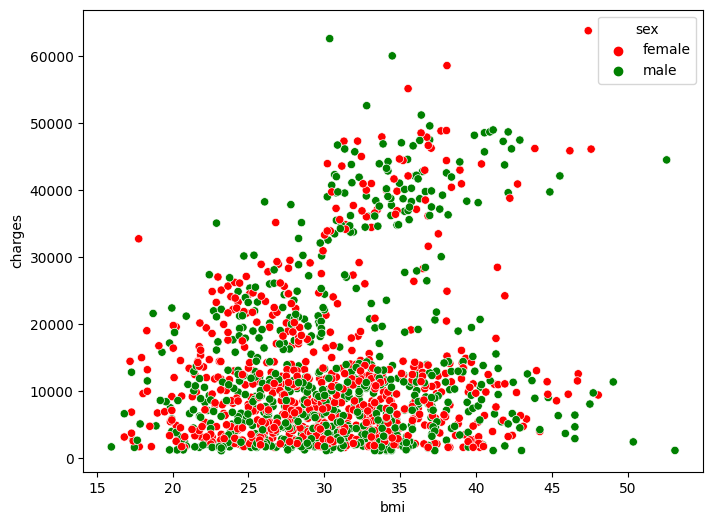

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='bmi', y='charges',hue='sex',palette= ['red','green'] )
plt.show()

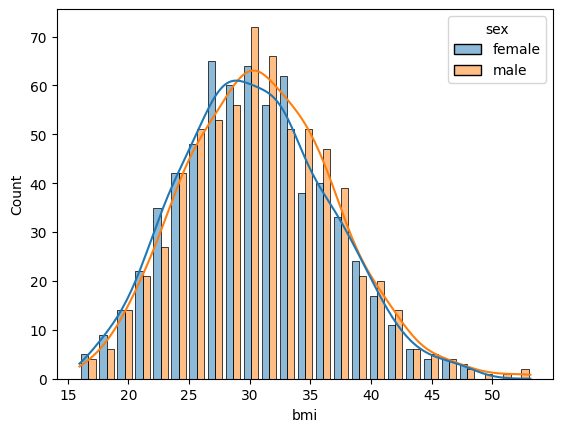

In [ ]:
sns.histplot(df, x="bmi", hue="sex",  multiple="dodge",shrink=.8, kde=True)
plt.show()

### - Visualmente, não parece ter alguma diferença de imc para os sexos

Mas mais uma vez vamos realizar um teste t

In [ ]:
# T-test para verificar diferença de imc(bmi) entre os sexos
Ho = "Não há diferença de imc entre os sexos"   # Stating the Null Hypothesis
Ha = "Há diferença de imc entre os sexos"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # amostra de imc de homens
y = np.array(df[df.sex == 'female'].bmi) # amostra de imc de mulheres

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # realizando t-test

if p_value < 0.05:  # alpha de 0.05
    print(f'{Ha} dado o valor-p de ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} dado o valor-p de ({p_value.round(3)}) > 0.05')

Não há diferença de imc entre os sexos dado o valor-p de (0.09) > 0.05


##### *Isso significa que o imc entre os sexos estatisticamente não difere.*

## A proporção de fumantes é significativamente diferente em diferentes gêneros?

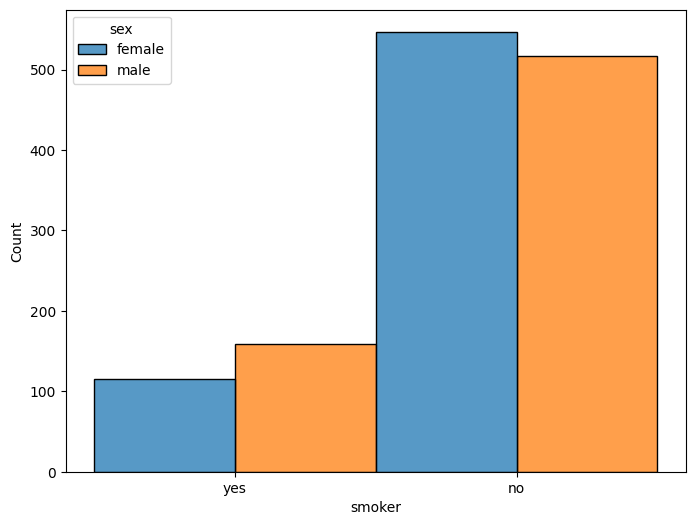

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df, x="smoker", hue="sex", multiple='dodge')
plt.show()

### Visualmente não aparenta muita diferença nas proporções de cada sexo. Vamos realizar um teste qui-quadrado desta vez

In [ ]:

# qui-quadrado para verificar se há diferença entre 
# o hábito de fumar entre os gêneros 
Ho = "Não há diferença no hábito de fumar entre os gêneros"   # hipótese nula
Ha = "Há diferença no hábito de fumar entre os gêneros"   # hipótese alternativa

crosstab = pd.crosstab(df['sex'],df['smoker'])  # tabela de contingencia para sexo e genero

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab) # teste

if p_value < 0.05:  # alpha de 0.05
    print(f'{Ha} dado o valor-p de ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} dado o valor-p de ({p_value.round(3)}) > 0.05')
crosstab

Há diferença no hábito de fumar entre os gêneros dado o valor-p de (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


##### *Bam! A proporção de fumantes entre os homens é significativamente diferente das mulheres. Esse é poder da estatística* 🙂

### **Há diferença significativa no hábito de fumar entre diferentes regiões?**

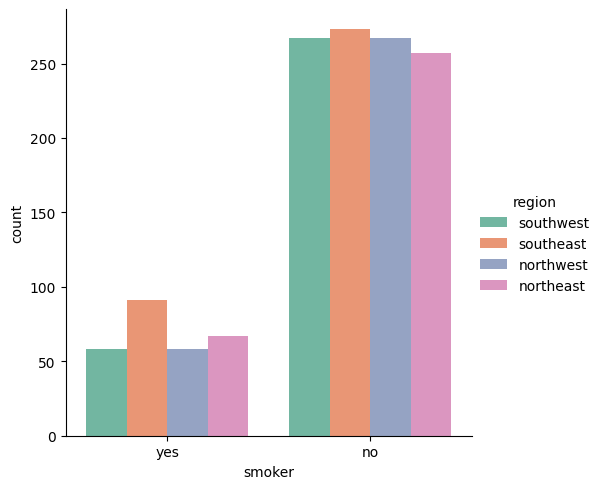

In [ ]:
sns.catplot(x='smoker',kind='count',hue='region',palette='Set2',data=df)
plt.show()

In [ ]:
# teste qui-quadrado
Ho = "Região não afeta o hábito de fumar" 
Ha = "Região afeta o hábito de fumar"   

crosstab = pd.crosstab(df['smoker'], df['region'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05: 
    print(f'{Ha} dado um valor-p de ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} dado um valor-p de ({p_value.round(3)}) > 0.05')
crosstab

Região não afeta o hábito de fumar dado um valor-p de (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


##### *Hábitos de fumar de pessoas de diferentes regiões são semelhantes*

## A distribuição do IMC entre mulheres sem filhos, um filho e dois filhos é a mesma?

Vamos realizar um teste One-Way ANOVA que é útil quando você quer testar três grupos ou mais para ver se há uma diferença entre eles.

In [ ]:

# Teste para ver se as distribuições dos valores de IMC para mulheres com diferentes números de filhos são significativamente diferentes

Ho = "Número de filhos não afeta o imc" 
Ha = "úmero de filhos afeta o imc"  


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(f'{Ha} dado o valor-p de ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} dado o valor-p de ({p_value.round(3)}) > 0.05')

Número de filhos não afeta o imc dado o valor-p de (0.716) > 0.05


##### *IMC não é alterado pelo número de filhos que uma mulher tem.*